In [1]:
import tensorflow

In [2]:
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

Using TensorFlow backend.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 

In [5]:
train_df = pd.read_csv("train.csv")

In [6]:
len(train_df.columns)

18

In [7]:
train_df.head()

,amount_value,id,amount_currency,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardNumber,paymentMethod_cardType,paymentMethod_cardSubType,paymentMethod_cvv,paymentMethod_encodedPaymentToken,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time,class
0,18253.30,0,USD,virtual,edge,pos,134.93.42.168,544011954,magstripe,2174-3628-6995-3987,JCB,Student,61,szQSTkeL,6,2027,2020-08-30 05:21:24,0
1,15870.89,1,USD,virtual,chrome,pos,78.92.229.26,9718272187,nfcc,4498-2553-8930-9552,JCB,Student,200,fdptXXrc,1,2026,2020-09-03 23:21:01,0
2,41109.80,2,USD,online,chromio,pos,197.84.118.231,1659938058,magstripe,8246-8688-8907-4387,JCB,Prepaid,259,UTXzvode,0,2021,2020-08-03 11:43:53,1
3,70604.95,3,USD,virtual,chrome,mobile,192.113.64.253,986924301,magstripe,3563-5044-6927-1494,JCB,Business,685,gVRZqrdu,7,2023,2020-07-22 04:28:32,0
4,51216.66,4,USD,virtual,chrome,mobile,48.81.200.252,9399699174,nfcc,4253-0351-2318-7737,JCB,Business,131,FGZLLHSX,6,2025,2020-02-29 13:35:21,0


In [8]:
#transform transaction time in seconds
def get_day(x):
    day = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return day.timestamp()

In [9]:
train_df['transaction_time'] = train_df['transaction_time'].apply(get_day)
train_df['transaction_time']

0        1.598754e+09
1        1.599164e+09
2        1.596444e+09
3        1.595381e+09
4        1.582976e+09
             ...     
99995    1.587667e+09
99996    1.588359e+09
99997    1.577932e+09
99998    1.582716e+09
99999    1.598561e+09
Name: transaction_time, Length: 100000, dtype: float64

In [10]:
class_df = train_df['class'].value_counts().to_frame().reset_index()
class_df['percentages'] = class_df['class'].apply(lambda val: round(100*float(val)/len(train_df), 2))
class_df

,index,class,percentages
0,1,50025,50.02
1,0,49975,49.98


In [11]:
non_fraud = train_df[train_df['class'] == 0].sample(1000)
fraud = train_df[train_df['class'] == 1].sample(1000)

df = non_fraud.append(fraud).reset_index(drop=True)
X = df.drop(['class'], axis=1)
#we select only the numerical columns
X_small = X[['amount_value', 'merchantRefTransactionId', 'paymentMethod_cvv', 'paymentMethod_expiryMonth', 'paymentMethod_expiryYear', 'transaction_time']]
X_small = X_small.values

Y = df['class'].values
X

,amount_value,id,amount_currency,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardNumber,paymentMethod_cardType,paymentMethod_cardSubType,paymentMethod_cvv,paymentMethod_encodedPaymentToken,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time
0,26323.14,2273,USD,virtual,edge,pos,245.247.24.139,1185549616,chip,7021-7485-0161-2289,Visa,Prepaid,635,TZXrrJPa,0,2025,1.591614e+09
1,93744.20,64152,USD,online,edge,pc,132.88.155.202,5082132553,nfcc,2921-5742-6477-3822,JCB,Student,807,dqXrqPgP,1,2023,1.592942e+09
2,74997.03,68062,USD,virtual,edge,pos,164.2.43.243,1823530783,nfcc,2140-3722-5819-0700,JCB,Student,695,pdeVVRuX,0,2027,1.596084e+09
3,34747.33,3493,USD,virtual,edge,pc,14.3.168.205,3022923087,magstripe,6941-3377-9566-3397,JCB,Business,951,RLPMLggu,11,2022,1.587183e+09
4,82259.90,1321,USD,virtual,chrome,pos,5.223.122.131,5412351537,chip,8132-8557-7679-7535,Visa,Student,828,iABGmUUA,11,2019,1.590560e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,40051.93,1781,USD,online,chrome,pc,6.197.66.220,6161673059,nfcc,7903-4732-6406-2054,JCB,Generic,699,scChmLNF,9,2021,1.593123e+09
1996,97450.65,94302,USD,virtual,chrome,mobile,37.208.110.108,1647466959,magstripe,4423-9948-0703-9565,Visa,Prepaid,974,hWjLIMUf,8,2026,1.594877e+09
1997,65929.19,76490,USD,virtual,chrome,pos,202.78.205.51,7669768041,chip,2748-7667-5119-9152,JCB,Student,664,wVhHdQbT,5,2019,1.594758e+09
1998,89581.36,22296,USD,virtual,chrome,pc,86.91.69.23,5859718356,magstripe,0229-7966-5506-5801,JCB,Student,585,KgQYiNxQ,1,2023,1.580871e+09


In [12]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1) # fits the data into a 2D embedded space

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc=name)
    plt.savefig("graph.png")
    plt.show()
    

In [13]:
Y.dtype

dtype('int64')

C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'original.png'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


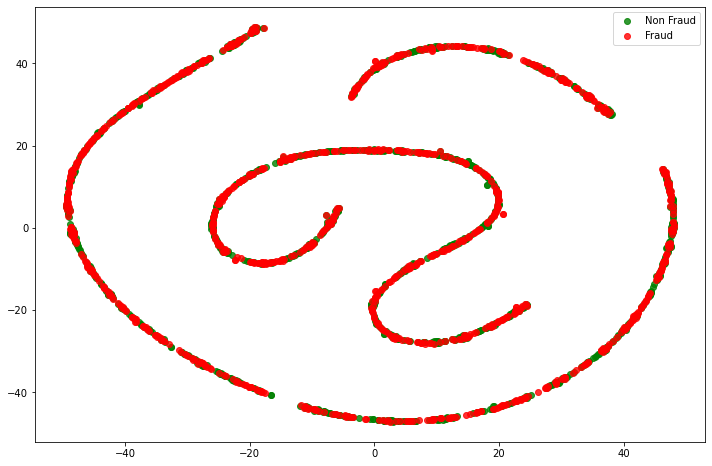

In [14]:
tsne_plot(X_small, Y, "original.png")

In [15]:
len(X.columns)

17

In [18]:
#scale the data
#TODO: try standardization also, check the results
#get list of categorical features
categorical_features = [col for col in list(train_df.columns) if col not in ['amount_value', 'merchantRefTransactionId', 'paymentMethod_cvv', 'paymentMethod_expiryMonth', 'paymentMethod_expiryYear', 'transaction_time']]
categorical_features

#one-hot encoding the categorical features
train_df[['channel', 'deviceDetails_browser', 'deviceDetails_device',
                                           'paymentMethod_apmType', 'paymentMethod_cardType', 'paymentMethod_cardSubType']] = train_df[['channel', 'deviceDetails_browser', 'deviceDetails_device',
                                           'paymentMethod_apmType', 'paymentMethod_cardType', 'paymentMethod_cardSubType']].astype('category')
encoded_feats = pd.get_dummies(train_df[['channel', 'deviceDetails_browser', 'deviceDetails_device',
                                           'paymentMethod_apmType', 'paymentMethod_cardType', 'paymentMethod_cardSubType']])

# print(encoded_feats)
X = train_df.drop(categorical_features, axis=1)
len(X.columns)
X = pd.concat([X, encoded_feats], axis=1)
len(X.columns)

Y = train_df['class'].values

X[X.columns] = preprocessing.MinMaxScaler().fit_transform(X.values)
# X['amount_value'].min()  # just checking
X_norm, X_fraud = X[Y == 0], X[Y == 1]

In [21]:
# first NN
#TODO: try other activation functions, see how it performs
input_layer = Input(shape=(X.shape[1], ))

#encoding 
encoded = Dense(16, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(8, activation='relu')(encoded)

#decoding
decoded = Dense(8, activation='tanh')(encoded)
decoded = Dense(16, activation='tanh')(decoded)

#output
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [22]:
#TODO: try other optimizers/loss measurements
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [23]:
X_fraud

,amount_value,merchantRefTransactionId,paymentMethod_cvv,paymentMethod_expiryMonth,paymentMethod_expiryYear,transaction_time,channel_mobile,channel_online,channel_pos,channel_virtual,...,paymentMethod_cardType_American Express,paymentMethod_cardType_Discover,paymentMethod_cardType_JCB,paymentMethod_cardType_MasterCard,paymentMethod_cardType_Visa,paymentMethod_cardSubType_Business,paymentMethod_cardSubType_Generic,paymentMethod_cardSubType_Prepaid,paymentMethod_cardSubType_Secured,paymentMethod_cardSubType_Student
2,0.411100,0.165995,0.259259,0.000000,0.3,0.784368,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.530323,0.581864,0.418418,0.636364,0.5,0.855083,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.578823,0.448680,0.820821,0.090909,0.2,0.729660,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.604782,0.987825,0.134134,0.000000,0.5,0.159307,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.503659,0.510931,0.888889,0.818182,0.3,0.378697,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0.203729,0.887236,0.532533,0.727273,0.3,0.222995,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99994,0.866648,0.788466,0.619620,0.545455,0.6,0.622538,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99995,0.480823,0.474955,0.946947,0.454545,0.7,0.413560,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,0.587414,0.708815,0.447447,0.727273,0.7,0.002244,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# train the network
autoencoder.fit(X_norm[0:2000], X_norm[0:2000], batch_size = 256,
                epochs = 20, validation_split = 0.20) # 20% of the data will be used for validation

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 0s 8us/step - loss: 0.2877 - val_loss: 0.2671
Epoch 2/20
1600/1600 [==============================] - 0s 10us/step - loss: 0.2747 - val_loss: 0.2560
Epoch 3/20
1600/1600 [==============================] - 0s 11us/step - loss: 0.2646 - val_loss: 0.2482
Epoch 4/20
1600/1600 [==============================] - 0s 11us/step - loss: 0.2571 - val_loss: 0.2424
Epoch 5/20
1600/1600 [==============================] - 0s 9us/step - loss: 0.2514 - val_loss: 0.2373
Epoch 6/20
1600/1600 [==============================] - 0s 7us/step - loss: 0.2462 - val_loss: 0.2329
Epoch 7/20
1600/1600 [==============================] - 0s 7us/step - loss: 0.2415 - val_loss: 0.2286
Epoch 8/20
1600/1600 [==============================] - 0s 7us/step - loss: 0.2369 - val_loss: 0.2246
Epoch 9/20
1600/1600 [==============================] - 0s 6us/step - loss: 0.2326 - val_loss: 0.2208
Epoch 10/20
1600/1600 [=========

In [29]:
# obtain the latent representation
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [30]:
norm_hid_rep = hidden_representation.predict(X_norm[2000:4000])
fraud_hid_rep = hidden_representation.predict(X_fraud[0:2000])

C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'latent_representation.png'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


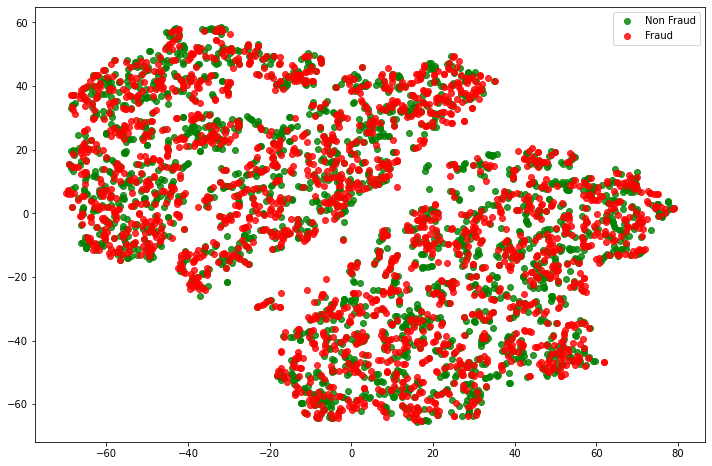

In [31]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")